In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
print('Savarankiškas darbas')
import datetime
print('Pasiruošta',datetime.datetime.now())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# import os
# import glob

Savarankiškas darbas
Pasiruošta 2024-09-23 17:45:41.764805


In [53]:
# Turite nusiskaityti iš SQL DB lentelės autopliuslt į Pandas DataFrame 
# gamintoją, kainą, pagaminimo datą, ridą, pavarų tipą, variklio informaciją. 
# SQL užklausoje turite atmesti tuos įrašus, kur rida nenurodyta, 
# taip pat palikite tik nesikartojančius įrašus 
# (atranka pagal ID stuleplį - jei ID sutampa - reiškia, jog skelbimas dubliuojasi)

#prisijungimas prie mySQL, ir kursoriaus sukūrimas

DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C=DB.cursor()

#sql užklausa per pandas sql_query
sql="""select gamintojas g, price k, pagaminimo_data d, rida r, pavaros p, variklis v from autopliuslt"""
df = pd.read_sql_query(sql, con=DB) # Sukuriamas Pandas DF.

df.head(2)

print('\nPrisijungta',datetime.datetime.now())

/tmp/ipykernel_3409/2585834445.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, con=DB) # Sukuriamas Pandas DF.



Prisijungta 2024-09-23 18:51:21.053732


In [4]:
# Kuriu papildomus laukus:

def toInt(s):
    ss=s.replace(' ','').replace('km','')
    if ss.isnumeric():
        return int(ss)
    else :
        return np.nan

def amz(s):
    return 2024-int(s[:4])
# Būtų įdomu įvertinti ir mėnesius !!!

def kW(txt):
    s1=txt.split('(')
    if(len(s1)<2):
        return 0
    s2=s1[1].split('kW')
    if(len(s2)<2):
        return 0
    return int(s2[0])

df['k_int']=df['k'].apply(toInt) # Kaina.
df['r_int']=df['r'].apply(toInt) # Rida.
df['d_int']=df['d'].apply(toInt) # Data - veikia tik jei tik metų skaičius.
df['a_int']=df['d'].apply(amz) # Amžius.
df['kW_int']=df['v'].apply(kW) # Galia.

df['r_5000']=df['r_int'].apply(lambda s: s // 5000 * 5000) # Naudoti ceil() !!!

df.head(2)

,g,k,d,r,p,v,k_int,r_int,d_int,a_int,kW_int,r_5000
0,BMW,19 500,2005-12,253 000 km,Automatinė,"4999 cm³, 507 AG (373kW)",19500,253000.0,NaN,19,373,250000.0
1,Mitsubishi,2 700,2006,195 405 km,Automatinė,"2378 cm³, 160 AG (118kW)",2700,195405.0,2006.0,18,118,195000.0


Kainos priklausomybė nuo ridos (scatter)


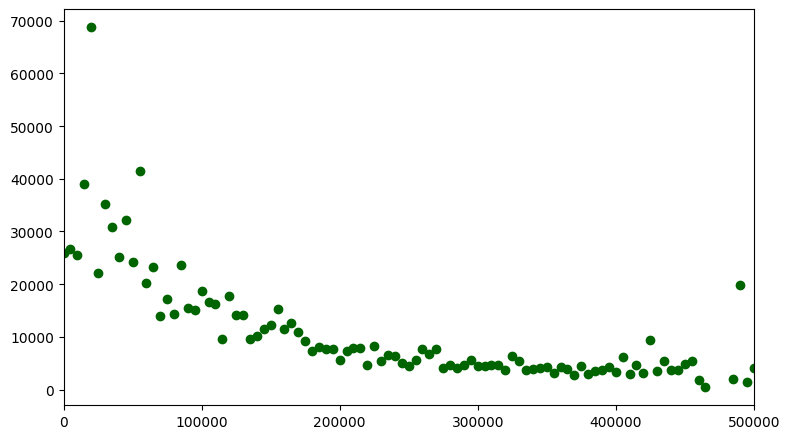

In [12]:
print('Kainos priklausomybė nuo ridos (scatter)')

dfg=df[['r_5000','k_int']].groupby('r_5000').mean(numeric_only=True).reset_index()
# print(dfg.head(3))

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.scatter(dfg['r_5000'], dfg['k_int'],color='Darkgreen')
axis.set_xlim(0,500000)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

Kainos priklausomybė nuo ridos (seaborn.regplot)


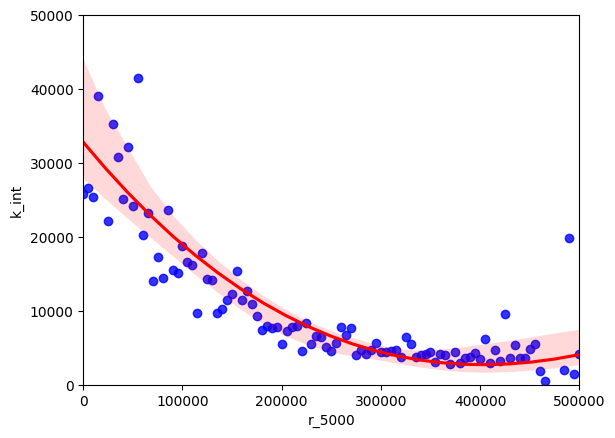

In [16]:
print('Kainos priklausomybė nuo ridos (seaborn.regplot)')

import seaborn as sns

dfg=df[['r_5000','k_int']].groupby('r_5000').mean(numeric_only=True).reset_index()
# print(dfg.head(3))

axis=sns.regplot(data=dfg,x='r_5000',y='k_int',order=3,scatter_kws={"color":"blue"},line_kws={"color":"red"})
axis.set_xlim(0,5e5)
axis.set_ylim(0,5e4)
plt.show()


In [37]:
# df['R'] = df['r'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# df['K'] = df['k'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# # df['amžius'] = df['d'].apply(lambda s: 2024-int(s[:4])) # ???
# df.head()

Kainos priklausomybė nuo amžiaus (seaborn.regplot)


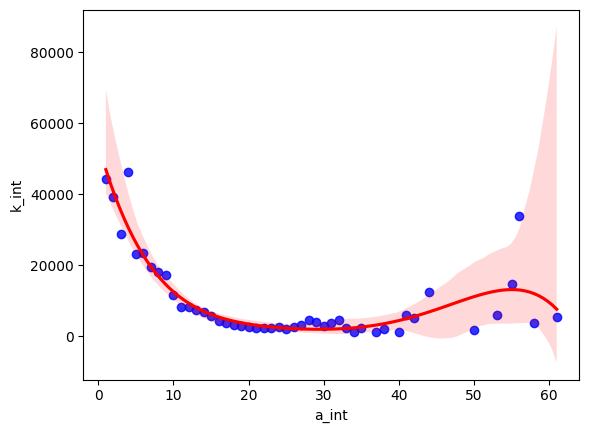

In [18]:
# Vizualizuokite, kaip nuo amžiaus priklauso automobilių kaina. 
# Panaudokite seaborn regplot, kad pademonstruotumėte trendą.

print('Kainos priklausomybė nuo amžiaus (seaborn.regplot)')

import seaborn as sns

dfg=df[['a_int','k_int']].groupby('a_int').mean(numeric_only=True).reset_index()
# print(dfg.head(3))

axis=sns.regplot(data=dfg,x='a_int',y='k_int',order=5,scatter_kws={"color":"blue"},line_kws={"color":"red"})
# axis.set_xlim(0,5e5)
# axis.set_ylim(0,5e4)
plt.show()


Kainos priklausomybė nuo amžiaus (seaborn.regplot)


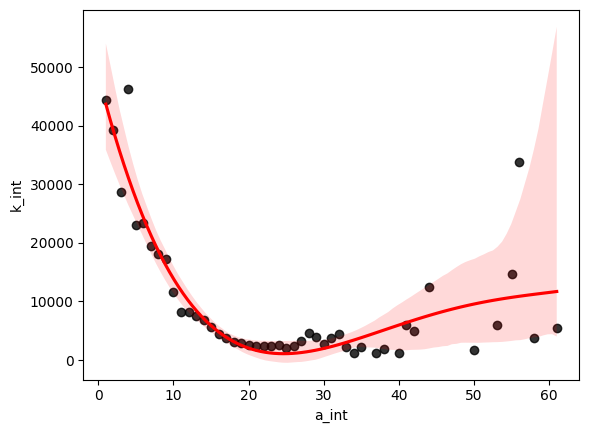

In [20]:
print('Kainos priklausomybė nuo amžiaus (seaborn.regplot)')

import seaborn as sns

dfg=df[['a_int','k_int']].groupby('a_int').mean(numeric_only=True).reset_index()
# print(dfg.head(3))

axis=sns.regplot(data=dfg,x='a_int',y='k_int',order=4,scatter_kws={"color":"black"},line_kws={"color":"red"})
# axis.set_xlim(0,5e5)
# axis.set_ylim(0,5e4)
plt.show()


Kainos priklausomybė nuo galios (seaborn.regplot)


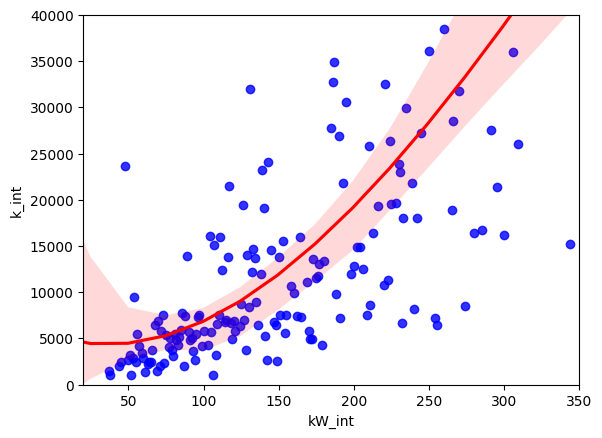

In [21]:
# Atvaizduokite priklausomybę tarp variklio galios kilovatais (kW) ir kainos.
# ar yra kokia nors pastebima priklausomybė?

print('Kainos priklausomybė nuo galios (seaborn.regplot)')

import seaborn as sns

dfg=df[['kW_int','k_int']].groupby('kW_int').mean(numeric_only=True).reset_index()
# print(dfg.head(3))

axis=sns.regplot(data=dfg,x='kW_int',y='k_int',order=4,scatter_kws={"color":"blue"},line_kws={"color":"red"})
axis.set_xlim(20,350) # kW
axis.set_ylim(0,40000) # €
plt.show()


Automatinės ir mechaninės kainos priklausomybė nuo amžiaus (seaborn.regplot)


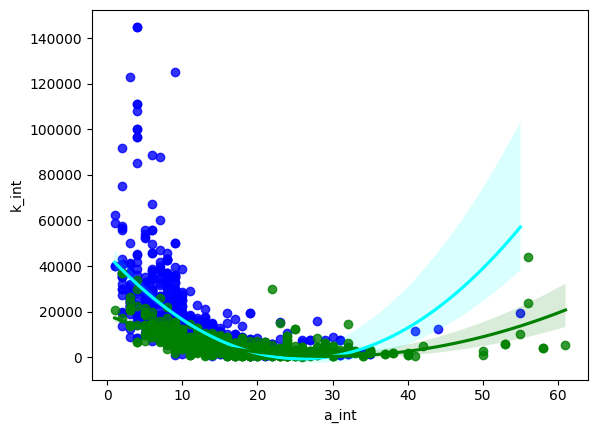

In [52]:
# kas brangiau - mechaninė ar automatinė? Kiek vienetų rinkoje buvo su mechan, ir su automat?

print('Automatinės ir mechaninės kainos priklausomybė nuo amžiaus (seaborn.regplot)')

import seaborn as sns

df_auto=df.query("p=='Automatinė'")
df_mech=df.query("p!='Automatinė'")
# print(df_mech.head(3))

dfg=df[['a_int','k_int','p']].groupby('a_int').mean(numeric_only=True).reset_index()
# print(df.head(3))

sns.regplot(data=df_auto,x='a_int',y='k_int',order=2,scatter_kws={"color":"blue"},line_kws={"color":"cyan"})
sns.regplot(data=df_mech,x='a_int',y='k_int',order=2,scatter_kws={"color":"green"},line_kws={"color":"green"})
# axis.set_xlim(0,40)
# axis.set_ylim(0,5e4)
plt.show()


In [ ]:
# Pie of Pie ir Bar of Pie aprašyta StackOwerflow.
# Užduotis - parašyti fukciją.
# Kitas užsiėmimas 2024-09-23.

In [14]:
print('Kitas užsiėmimas 2024-09-23.')

Kitas užsiėmimas 2024-09-23.
